# Yale Hackathon

## 1(a)

In [1]:
import dynamiqs as dq
import jax.numpy as jnp
import numpy as np

### Fock State

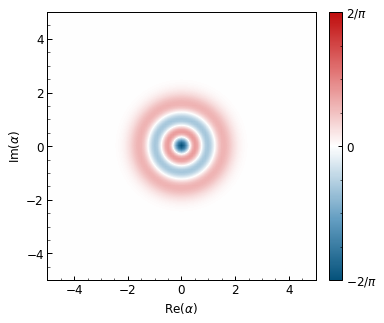

In [2]:
n_max = 20
fock = 3
psi = dq.fock(n_max, fock)
dq.plot.mplstyle(dpi=70)
dq.plot.wigner(psi)

### Gaussian/Coherent State

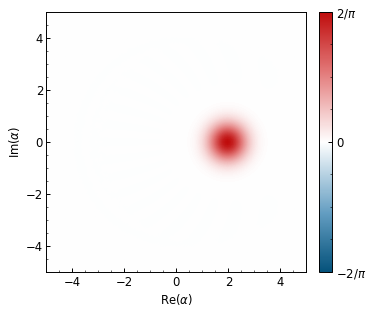

In [3]:
n_max = 20
alpha = 2
psi = dq.coherent(n_max, alpha)
dq.plot.mplstyle(dpi=70)
dq.plot.wigner(psi)

### 2-Cat State

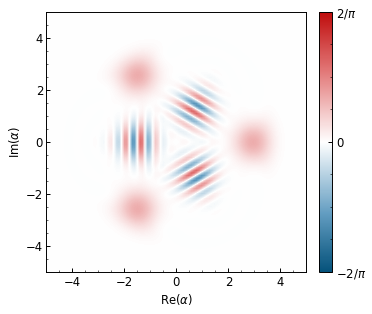

In [ ]:
n_max = 20
alpha = 3
psi = dq.unit(dq.coherent(n_max, alpha*np.exp(1j*(2/3)*jnp.pi)) + \
        dq.coherent(n_max, alpha*np.exp(1j*(4/3)*jnp.pi)) +\
        dq.coherent(n_max, alpha*np.exp(1j*(6/3)*jnp.pi)))
dq.plot.mplstyle(dpi=70)
dq.plot.wigner(psi)

### 3-Cat State

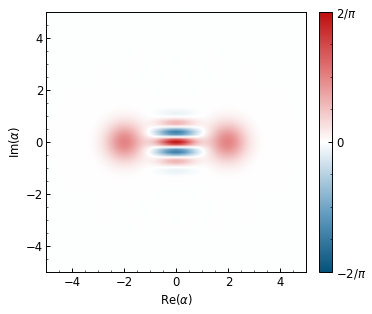

In [ ]:
n_max = 20
alpha = 2
psi = dq.unit((dq.coherent(n_max, alpha) + dq.coherent(n_max, -alpha)))
dq.plot.mplstyle(dpi=70)
dq.plot.wigner(psi)

### Dissipative Cat State from a Two-Photon Exchange Hamiltonian

In [5]:
# 1) Set up a two-mode system & Hilbert Space truncation
n_a = 12
n_b = 12

# Annihilation operators for modes a and b
a, b = dq.destroy(n_a, n_b)

# Parameters
g2      = 1.0         # two-photon exchange coupling
eps_b   = -4.0        # drive on mode b
kappa_b = 10.0        # dissipation rate on mode b
T       = 4.0         # total time
nt      = 1001         # number of time points

# Define the two-photon exchange Hamiltonian:
#   H = g2^* a^dagger^2 b + g2 a^2 b^dagger + eps_b^* b + eps_b b^dagger
H = (
    jnp.conjugate(g2) * dq.dag(a) @ dq.dag(a) @ b
  + g2                * a @ a     @ dq.dag(b)
  + jnp.conjugate(eps_b) * b
  + eps_b                * dq.dag(b)
)

# Single Lindblad jump operator on mode b:
#   sqrt(kappa_b) * b
jump_ops = [ jnp.sqrt(kappa_b) * b ]

# Initial two-mode vacuum state
psi0 = dq.tensor(
    dq.basis(n_a, 0),
    dq.basis(n_b, 0)
)

# Times at which we save the density matrix
tlist = jnp.linspace(0, T, nt)

# ------------------------------------------------
# 2) Solve the master equation
# ------------------------------------------------
result = dq.mesolve(H, jump_ops, psi0, tlist)

|██████████| 100.0% ◆ elapsed 2.67s ◆ remaining 0.00ms  


In [13]:
gif = dq.plot.wigner_gif(dq.ptrace(result.states,0, dims = (n_a,n_b)), fps=25, xmax=4.0, ymax=2.0)

100%|██████████| 125/125 [00:20<00:00,  6.10it/s]


In [14]:
gif = dq.plot.wigner_gif(dq.ptrace(result.states,1, dims = (n_a,n_b)), fps=25, xmax=4.0, ymax=2.0)

100%|██████████| 125/125 [00:19<00:00,  6.30it/s]
